# Homework 4
----
**Nota bene:**  You should not use loops in any of your answers, only array operations.
# Part 1
The files `data1-X.txt` and `data1-y.txt` contain a tiny made-up dataset.  Load them:

In [313]:
import numpy as np
from zipfile import ZipFile
with ZipFile('hw4-data.zip') as zf:
    with zf.open('data1-X.txt') as f:
        X = np.loadtxt(f)
    with zf.open('data1-y.txt') as f:
        y = np.loadtxt(f)
    with zf.open('data1-X1.txt') as f:
        X1 = np.loadtxt(f)

In [314]:
X

array([[0.12, 3.8 ],
       [0.15, 4.6 ],
       [0.18, 5.2 ],
       [0.2 , 5.  ],
       [0.2 , 4.9 ],
       [0.16, 2.9 ],
       [0.18, 3.4 ],
       [0.21, 3.9 ],
       [0.22, 4.2 ],
       [0.24, 4.3 ]])

In [315]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [316]:
X1

array([[0.13, 4.2 ],
       [0.21, 3.7 ]])

In the previous homework, we did plotting using convenience functions from the matplotlib.plplot module.  It is generally better to get comfortable using plot objects, called "Axes".  They give one much finer control over plotting.

First, create an empty canvas, called a "figure":

In [317]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

The figure can hold one or more Axes (also known as "subplots").  These display as rectangles with tick marks.  Calling `subplots()` with no arguments creates a single set of Axes.

In [318]:
ax = fig.subplots()

As a convenience, plt contains a `subplots()` function that creates both the figure and Axes at the same time:

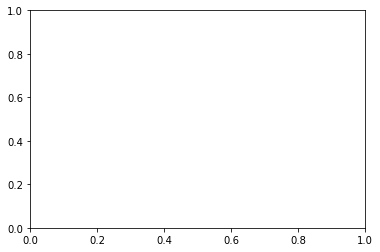

In [319]:
(fig, ax) = plt.subplots()

`scatter()` is actually a method of Axes.

In [320]:
from matplotlib.colors import ListedColormap
dark = ListedColormap(['red', 'blue'])
ax.scatter(X[:,0], X[:,1], c=y, cmap=dark)

To see the plot, look at the figure.

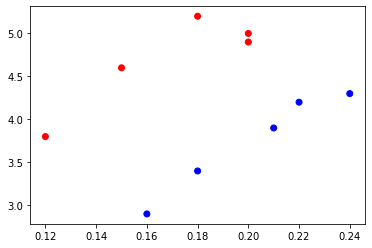

In [321]:
fig

It will be convenient to have a `plot_points` function.

In [322]:
def plot_points (ax, X, y, cmap):
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

Here is a function to plot the test points as text:

In [323]:
def plot_test (ax, X):
    for i in range(X.shape[0]):
        ax.text(X[i,0], X[i,1], str(i))

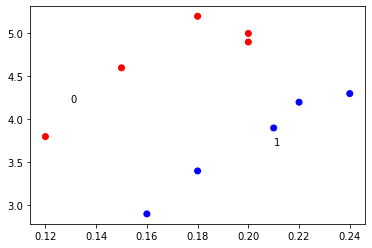

In [324]:
plot_test(ax, X1)
fig

A label vector was not provided for the test set, but the correct labels should be obvious:

In [325]:
y1 = np.array([0, 1])

# Q1
Write a function that trains and returns a 1-nearest neighbors classifier, giving training set (*X*, *y*).

In [326]:
from sklearn.neighbors import KNeighborsClassifier
def train_nn (X, y):
    return KNeighborsClassifier(1).fit(X,y)

For our particular training set:

In [327]:
clf = train_nn(X, y)

One expects a nearest-neighbors classifier to do very well on the training data:

In [328]:
clf.score(X, y)

1.0

Judging by the plot above, one would think it should do equally well on the test data.  But it doesn't:

In [329]:
clf.score(X1, y1)

0.0

Let's look at the decision boundaries.

# Q2
Write a function that takes a set of Axes `ax`, a classifier `clf`, a bounding rectangle `rect`, and a colormap `cmap`, and fills in the decision regions using `contourf()`.  There is no return value.  Be sure to use `ax.contourf()`, **not** `plt.contourf()`.  The function should create a 100 x 100 grid, call the classifier's prediction function at each point, and use the predicted class to determine the color at that point.  The bounding rectangle is a tuple (*xmin*, *xmax*, *ymin*, *ymax*).  The x-axis of the grid should extend from *xmin* to *xmax*, and the y-axis should extend from *ymin* to *ymax*.

This basically involves just copying the appropriate bits from HW 2.

In [330]:
def plot_boundaries (ax, clf, rect, cmap):
    (xmin, xmax, ymin, ymax) = rect
    axis1 = np.linspace(xmin, xmax, 100)
    axis2 = np.linspace(ymin, ymax, 100)
    (G1, G2) = np.meshgrid(axis1, axis2)
    a = G1.ravel()
    b = G2.ravel()
    X_grid = np.column_stack((a,b))
    y_grid = clf.predict(X_grid)
    y_grid = y_grid.reshape((100,100))
    ax.contourf(G1, G2, y_grid, cmap = cmap)

# Q3
To test `plot_boundaries()`, we need a bounding rectangle.  Write a function `bounding_rectangle()` that takes a design matrix *X*.  Let "x" be the first column and "y" be the second column.  Compute xmin, xmax, ymin, and ymax for the data, then add a buffer of 5% of extra space.  That is, let x_extra be 5% of xmax - xmin.  Subtract x_extra from xmin and add it to xmax, to get the quantities that go into the bounding rectangle; handle ymin and ymax similarly.  The return value is a tuple (*xmin*, *xmax*, *ymin*, *ymax*).

In [331]:
def bounding_rect (X):
    #computing of all min and max
    xmin = np.min(X[:, 0])
    xmax = np.max(X[:, 0])
    ymin = np.min(X[:, 1])
    ymax = np.max(X[:, 1])
    
    #calculating x_extra (5% of xmax - xmin)
    x_extra = (xmax - xmin) * .05
    
    xmin = xmin - x_extra
    xmax = xmax + x_extra
    
    #same thing for y
    y_extra = (ymax - ymin) * .05
    
    ymin = ymin - y_extra
    ymax = ymax + y_extra

    return (xmin, xmax, ymin, ymax)

Eyeball the results to make sure they look reasonable for matrix *X*.

In [332]:
rect = bounding_rect(X)
rect

(0.11399999999999999, 0.246, 2.7849999999999997, 5.315)

We'll also need a lighter-colored colormap.

In [333]:
light = ListedColormap(['#ffdddd', '#ddddff'])

Now test `plot_boundaries()`.

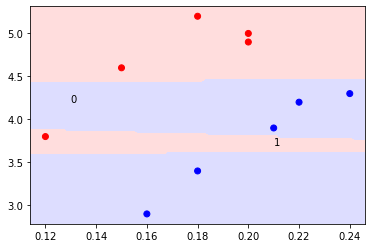

In [334]:
(fig, ax) = plt.subplots()
plot_boundaries(ax, clf, rect, light)
plot_points(ax, X, y, dark)
plot_test(ax, X1)

You should see decision boundaries that are almost horizontal.  What has gone wrong?

Look back at the lecture notes for Nearest Neighbors.  The decision boundaries are lines that are perpendicular to pairs of training points that are next to each other but belong to different classes.  The boundaries we are getting only make sense if the nearest neighbors to the lower left red point are actually the blue points that are second and third from the bottom.  How could that be?

Look at the scales of the two axes.  The problem isn't that the decision boundaries are skewed, the problem is that the plot is stretched out.

We can force the plot to use the same number of ticks per pixel on each axis by setting the **aspect ratio** to 1.

In [335]:
ax.set_aspect(1)

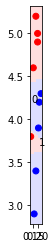

In [336]:
fig

To see it more clearly, let's adjust the x limits and replot:

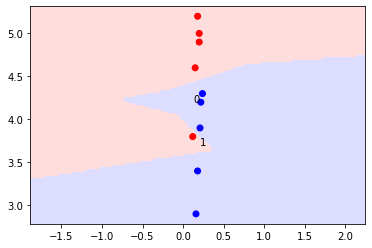

In [337]:
wide = (rect[0] - 2, rect[1] + 2, rect[2], rect[3])
(fig, ax) = plt.subplots()
plot_boundaries(ax, clf, wide, light)
plot_points(ax, X, y, dark)
plot_test(ax, X1)

Now it should be clear that Nearest Neighbors is behaving as advertised.  The problem is that the data is practically linear; the first feature hardly contributes at all.

We want to scale the data so that the original plot is correct (without any stretching).  Basically, we want to use the centering and scaling that we did in HW 1.

However, it is import to apply the *same transformation* to the test data.  So we actually need to keep the vectors of means and standard deviations to re-use them on the test data.  (We **don't** want to recompute them for the test data, then the training and test data would not be comparable.)

# Q4
Write a function that takes a design matrix and returns the means and standard deviations of the columns.  That is, the return value should be a pair (*means*, *stds*).

In [338]:
def means_and_stds (X):
    means = np.mean(X, axis = 0)
    stds = np.std(X, axis = 0)
    return(means, stds)

# Q5
Write a function that applies the transformation.  Given a design matrix *X* and means and standard deviations *stats*, it produces a new matrix in which the means are subtracted out of the columns, and the columns are then scaled by the standard deviations.

In [339]:
stats = means_and_stds(X)
print(stats)
S = transform(X, stats)
S1 = transform(X1, stats)

(array([0.186, 4.22 ]), array([0.03382307, 0.69828361]))


In [340]:
def transform (X, stats):
    X = X - stats[0]
    X = X/stats[1]
    return X

To check your work, make sure that the column means of *S* are (close to) 0 and the column standard deviations are (close to) 1.

In [341]:
means_and_stds(S)

(array([0.00000000e+00, 2.96984659e-16]), array([1., 1.]))

(The means and standard deviations of the test data will *not* necessarily be close to 0 and 1, but that doesn't matter.)

Now we need to retrain and replot.

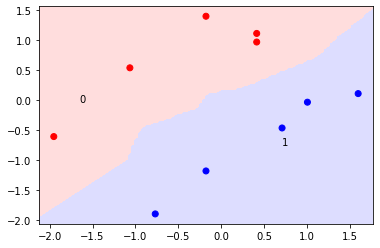

In [342]:
clf = train_nn(S, y)
(fig, ax) = plt.subplots()
plot_boundaries(ax, clf, bounding_rect(S), light)
plot_points(ax, S, y, dark)
plot_test(ax, S1)

This result should look a lot better.

In [343]:
clf.score(S1, y1)

1.0

# Part 2
## Document corpus
We'll turn to document similarity now.  There is a tiny corpus in `corpus.txt`, and a list of stop words in `stop_words.txt`.

In [344]:
with ZipFile('hw4-data.zip') as zf:
    with zf.open('corpus.txt') as f:
        corpus = [line.strip() for line in f]
    with zf.open('stop_words.txt') as f:
        stop_words = [line.strip() for line in f]

In [345]:
corpus

[b'The stars and the planets.',
 b'Planets orbit stars and moons orbit planets.',
 b'The planets around distant stars.',
 b'A distant nebula and stars.',
 b'Stars like daisies in a nebula.',
 b'Flowers like asters and daisies and roses.',
 b'Asters like stars in beds.',
 b'Care of roses.',
 b'Care of beds of flowers.',
 b'Beds of daisies.']

In [346]:
stop_words

[b'a', b'and', b'around', b'like', b'in', b'of', b'the']

## Counts
Sklearn provides a `CountVectorizer` that tokenizes a corpus, constructs a vocabulary, and converts documents to count vectors.  The protocol is similar to that with a classifier.  First, one instantiates the class:

In [347]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=stop_words)

Then one fits it to the corpus.  This does tokenization and constructs an internal table that maps words to feature indices.

In [348]:
cv.fit(corpus)

CountVectorizer(stop_words=[b'a', b'and', b'around', b'like', b'in', b'of',
                            b'the'])

The internal table is called `vocabulary_`.

In [349]:
cv.vocabulary_

{'the': 17,
 'stars': 16,
 'and': 0,
 'planets': 14,
 'orbit': 13,
 'moons': 10,
 'around': 1,
 'distant': 6,
 'nebula': 11,
 'like': 9,
 'daisies': 5,
 'in': 8,
 'flowers': 7,
 'asters': 2,
 'roses': 15,
 'beds': 3,
 'care': 4,
 'of': 12}

When one applies the vectorizer, it turns a document into a feature vector `x`.  Suppose `cv.vocabulary_['stars']` is `16`.  That means that `x[16]` is the count of how many times 'stars' occurs in the document.

Notice that the words have been converted to lower case and punctuation is discarded.  It is typical of a tokenizer that it does preprocessing steps of that sort.

To convert the corpus to feature vectors, the method is `transform()`.  This is analogous to the `predict()` method of a classifier, though the name is different because the vectorizer represents a preprocessing step, not a classifier.

In [350]:
C = cv.transform(corpus)
C

<10x18 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

The design matrix for a corpus in which the features are word counts is very sparse - most documents contain only a tiny fraction of the complete vocabulary, meaning that most entries in the feature vectors are 0.  Numpy has a sparse matrix representation that is considerably more efficient in this setting, especially when there are a lot of documents.  Unfortunately, sparse matrices do not support all matrix operations, and they also do not print out in a terribly informative way.  One can convert a sparse matrix to a regular (dense) matrix using the method `toarray()`:

In [351]:
C = C.toarray()
C

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

We know how to convert a word string to an index: `cv.vocabulary_[w]`.  How do we go the other direction?  Use the method `get_feature_names_out()`.

In [352]:
i = cv.vocabulary_['stars']
cv.get_feature_names_out()[i]

'stars'

To compute the vocabulary, the vectorizer has to tokenize the corpus.  Then when we call `transform()`, it tokenizes the corpus again.  That is a little inefficient, but it is motivated because we want to also transform the test set to feature vectors, but **we do not want to fit to the test set**.  If there are new words in the test set, they would be added to the vocabulary, and the test-set vectors would have a different length than the training-set vectors - bad news.

However, for convenience and efficiency, there is a combined `fit_transform()` method.  It should be used on the training set only!  But we could have done:

In [353]:
cv = CountVectorizer()
C = cv.fit_transform(corpus).toarray()
C

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

## IDF
There is also a `TfidfTransformer` that takes the counts as input and produces TF-IDF vectors as output.

In [354]:
from sklearn.feature_extraction.text import TfidfTransformer
t = TfidfTransformer(smooth_idf=False)
X = t.fit_transform(C).toarray()
X

array([[0.31066348, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.35730166,
        0.        , 0.24493066, 0.84606897],
       [0.2143549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36942479, 0.        , 0.        , 0.73884958, 0.49306962,
        0.        , 0.16899987, 0.        ],
       [0.        , 0.58689567, 0.        , 0.        , 0.        ,
        0.        , 0.46371789, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39166352,
        0.        , 0.26848574, 0.46371789],
       [0.43314333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.58981688, 0.        , 0.        , 0.        ,
        0.        , 0.58981688, 0.        , 0.        , 0.        ,
        0.        , 0.34149517, 0.        ],
    

# Q6
As mentioned in the lecture notes (Lec 4), sklearn uses a slightly non-standard formula for IDF: $\text{idf} = 1 + \log\frac{N}{n}$, where $n$ is the number of documents that contain the word in question, and $N$ is the total number of documents.  Write a function `compute_idfs()` that takes a count matrix *C* and computes IDF values for each of the columns, returning a vector.  (The rows of *C* represent documents and the columns represent words.) (Just to be explicit, you should **not** use TfidfTransformer nor any library function that computes IDFs.)

Tip: you may use `np.log()`.

In [355]:
def compute_idfs (C):
    a = np.array(C)
    N = np.shape(C)[0]
    n = np.count_nonzero(a > 0, axis = 0)
    P = N/n
    idf = np.array(1 + np.log(P))
    return idf

In [356]:
idf = compute_idfs(C)
idf

array([1.91629073, 3.30258509, 2.60943791, 2.2039728 , 2.60943791,
       2.2039728 , 2.60943791, 2.60943791, 2.60943791, 2.2039728 ,
       3.30258509, 2.60943791, 2.2039728 , 3.30258509, 2.2039728 ,
       2.60943791, 1.51082562, 2.60943791])

`compute_idfs()` is a reimplementation of the `fit()` method of TfidfTransformer.  The IDF weights are stored in the `idf_` member.

In [357]:
t.idf_

array([1.91629073, 3.30258509, 2.60943791, 2.2039728 , 2.60943791,
       2.2039728 , 2.60943791, 2.60943791, 2.60943791, 2.2039728 ,
       3.30258509, 2.60943791, 2.2039728 , 3.30258509, 2.2039728 ,
       2.60943791, 1.51082562, 2.60943791])

# Q7
The `transform()` method takes count vectors as input, multiples them by IDF values to turn them into TF-IDF vectors, and also normalizes them so that each output row has length one.  Write a function called `apply_idf()` that does the same thing.

Tip: the `norm()` function takes an `axis` keyword argument.

In [358]:
from scipy.linalg import norm
def apply_idf (idf, C):
    M = C * idf
    M = M/np.linalg.norm(M, axis = 1, keepdims = True)
    return M

If you've done everything right, the output of the following will match *X*.

In [359]:
apply_idf(idf, C)

array([[0.31066348, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.35730166,
        0.        , 0.24493066, 0.84606897],
       [0.2143549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36942479, 0.        , 0.        , 0.73884958, 0.49306962,
        0.        , 0.16899987, 0.        ],
       [0.        , 0.58689567, 0.        , 0.        , 0.        ,
        0.        , 0.46371789, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39166352,
        0.        , 0.26848574, 0.46371789],
       [0.43314333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.58981688, 0.        , 0.        , 0.        ,
        0.        , 0.58981688, 0.        , 0.        , 0.        ,
        0.        , 0.34149517, 0.        ],
    

## Retrieval
# Q8
To do classic ad hoc retrieval, one represents the query as a document in the same space, and one finds the nearest document using cosine similarity.  Write a function to do that.  As input, it takes a query string *q*, a matrix *X*, a CountVectorizer *cv*, and a TfidfTransformer *t*.  The query *q* is just a string, but note that [*q*] qualifies as a one-sentence corpus.  The matrix *X* has already been TF-IDF transformed and has normalized rows.  Transform the query and compare it to the rows of *X*.  **Caution:** never *fit* a preprocessor to the test data, only do the transform step.  The return value should be a column vector containing cosine values, one for each document.

In [360]:
def retrieve (q, X, cv, t):
    q = cv.transform([q]).toarray()
    q = t.transform(q).toarray()
    a = np.dot(q, X.T)
    b = norm(q, axis = 1) * norm(X, axis = 1)
    c = a/b
    return c

For example, the following should return a column vector containing 10 values, one for each document.  Four of the documents have no words in common with the query, so you should see four zeros.

In [361]:
s = 'distant red stars'
S = retrieve(s, X, cv, t)
S

array([[0.12272513, 0.08467919, 0.53583475, 0.6815445 , 0.1495718 ,
        0.        , 0.1495718 , 0.        , 0.        , 0.        ]])

One can find out which document has the greatest similarity value using `argmax()`.

In [362]:
S.argmax()

3

In [363]:
corpus[S.argmax()]

b'A distant nebula and stars.'

## Visualization
The feature space is 18-dimensional in this case, and would have many more dimensions for a larger corpus.  That makes visualization difficult.  There are a number of methods for converting the data to a 2-dimensional space in which the distances between points in the transformed space are good approximations for the distances between points in the original space.  We will look at two of them.

The dataset is not labeled, but inspection makes it clear that the first five documents are intended to be in the "astronomy" class, and the last five in the "botany" class.

In [364]:
y = np.concatenate([np.zeros(5), np.ones(5)])
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

A dimensionality-reduction method that has been around for a long time is Multi-Dimensional Scaling (MDS).  Import it, instantiate it, fit and transform the data:

In [365]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

You can confirm that the result is a 10 x 2 matrix instead of the original 10 x 18 matrix.

In [366]:
X_mds.shape

(10, 2)

We can use `plot_points()` to plot the points.  The `dark` colors are red-blue, that is, red = 0 = astronomy, blue = 1 = botany.

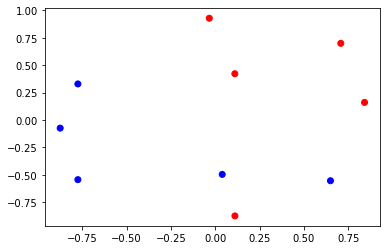

In [367]:
(fig, ax) = plt.subplots()
plot_points(ax, X_mds, y, dark)

A newer, and very popular, dimensionality-reduction method is t-SNE.  It is also in the sklearn.manifold module.  The constructor invocation is: `TSNE(n_components=2, init='pca')`.  Use it to transform the data; call the transformed data `X_tsne`.  (Don't worry about the warnings; they are just notifications that some details of the behavior are going to change in an upcoming release.)

In [368]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X)

C:\Users\alish\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\alish\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


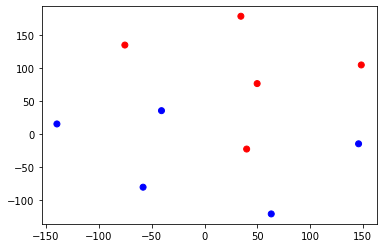

In [369]:
(fig, ax) = plt.subplots()
plot_points(ax, X_tsne, y, dark)